In [2]:
from google.colab import drive
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Set the path to the train data
# lp1_path = "/content/lp1.data"
# lp2_path = "/content/lp2.data"
# lp3_path = "/content/lp3.data"
# lp4_path = "/content/lp4.data"
# lp5_path = "/content/lp5.data"

In [5]:
lp1_path = "/content/drive/MyDrive/Datasets/DataFile/lp1.data"
lp2_path = "/content/drive/MyDrive/Datasets/DataFile/lp2.data"
lp3_path = "/content/drive/MyDrive/Datasets/DataFile/lp3.data"
lp4_path = "/content/drive/MyDrive/Datasets/DataFile/lp4.data"
lp5_path = "/content/drive/MyDrive/Datasets/DataFile/lp5.data"

In [6]:
# Function to read and process a file

def process_file(file_path):
    try:
        with open(file_path, 'r') as file:
            print(f"Processing file: {file_path}")

            # Read the contents of the file
            data = file.read()

            # Split the data into blocks based on the category
            blocks = data.split('\n\n')

            # Process each block
            for block in blocks:
                # Split the block into lines
                lines = block.split('\n')

                # Extract and print the category
                if lines:
                    category = lines[0].strip()
                    print(f"Category: {category}")

                    # Print the numerical values in each line
                    for line in lines[1:]:
                        values = line.split('\t')
                        print(values)

    except FileNotFoundError:
        print(f"File not found: {file_path}")

    except Exception as e:
        print(f"An error occurred: {e}")

# List of file paths
file_paths = [lp1_path, lp2_path, lp3_path, lp4_path, lp5_path]

# Process each file
for file_path in file_paths:
    process_file(file_path)


Streaming output truncated to the last 5000 lines.
['', '62', '-136', '10', '421', '459', '90']
['', '68', '-36', '81', '43', '96', '-8']
['', '64', '-83', '84', '54', '44', '3']
['', '64', '-2', '103', '-7', '84', '-11']
['', '64', '11', '100', '-35', '86', '-5']
['', '37', '13', '92', '-39', '47', '-8']
['', '-23', '-10', '85', '-6', '-48', '-11']
['', '2', '-2', '96', '-19', '-11', '-15']
['', '-29', '-2', '79', '-16', '-58', '-12']
['', '-30', '3', '79', '-35', '-65', '-10']
['', '-9', '-7', '79', '-9', '-30', '-8']
['', '-25', '-12', '79', '3', '-54', '-3']
['', '1', '1', '81', '-30', '-15', '-13']
['', '2', '-1', '84', '-18', '-15', '-19']
['', '1', '-5', '83', '-8', '-14', '-11']
Category: 
['lost']
['', '-45', '-23', '113', '57', '-97', '-45']
['', '-90', '-20', '53', '-7', '-206', '49']
['', '-35', '-20', '57', '34', '-65', '6']
['', '-10', '-18', '73', '18', '-23', '-3']
['', '23', '25', '75', '-38', '15', '-5']
['', '8', '11', '78', '-21', '-7', '-8']
['', '-5', '-22', '68',

In [7]:
# Function to read and process a file
def process_file(file_path, merged_data):
    try:
        with open(file_path, 'r') as file:
            print(f"Processing file: {file_path}")

            # Read the contents of the file
            data = file.read()

            # Split the data into blocks based on the category
            blocks = data.split('\n\n')

            # Process each block
            for block in blocks:
                # Split the block into lines
                lines = block.split('\n')

                # Extract and print the category
                if lines:
                    category = lines[0].strip()
                    print(f"Category: {category}")

                    # Append the numerical values to the merged data
                    for line in lines[1:]:
                        values = line.split('\t')
                        merged_data.append([category] + values)

    except FileNotFoundError:
        print(f"File not found: {file_path}")

    except Exception as e:
        print(f"An error occurred: {e}")

# List of file paths
file_paths = [lp1_path, lp2_path, lp3_path, lp4_path, lp5_path]

# Accumulate merged data
merged_data = []

# Process each file
for file_path in file_paths:
    process_file(file_path, merged_data)



Processing file: /content/drive/MyDrive/Datasets/DataFile/lp1.data
Category: normal
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Category: 
Cat

In [8]:
# Write merged data to a new file
output_file_path = "/content/merged_data.txt"
with open(output_file_path, 'w') as output_file:
    for row in merged_data:
        output_file.write('\t'.join(map(str, row)) + '\n')

print(f"Merged data written to: {output_file_path}")

Merged data written to: /content/merged_data.txt


In [9]:
# Specify the path to the merged data file
merged_data_path = "/content/merged_data.txt"

In [10]:
import pandas as pd

try:
    with open(merged_data_path, 'r', encoding='utf-8') as merged_file:
        # Read the contents of the merged file
        merged_data_content = merged_file.read()

        # Split the content into lines
        merged_lines = merged_data_content.split('\n')

        # Initialize lists to store features and labels
        all_features = []
        all_labels = []

        # Process data in chunks (15 columns for features + 1 column for label)
        for i in range(0, len(merged_lines), 16):
            # Extract features
            features_line = merged_lines[i:i+15]
            # Check if all lines have the expected number of values
            if all(len(line.split('\t')) == 8 for line in features_line):
                features = [line.split('\t') for line in features_line]
                all_features.append(features)
            else:
                print(f"Skipping invalid features at line {i+1}")
                continue

            # Extract label
            label_line = merged_lines[i+15]
            label_values = label_line.split('\t')
            all_labels.append(label_values)

        # Create a DataFrame for features
        features_df = pd.DataFrame(all_features, columns=[f'feature_{i}' for i in range(1, 16)])

        # Create a DataFrame for labels
        labels_df = pd.DataFrame(all_labels, columns=['label_1', 'label_2'])

        # Combine features and labels DataFrames
        combined_df = pd.concat([features_df, labels_df], axis=1)

        # Display the combined DataFrame
        print(combined_df)

except FileNotFoundError:
    print(f"Merged data file not found: {merged_data_path}")

except Exception as e:
    print(f"An error occurred while reading the merged data file: {e}")


Skipping invalid features at line 7409
                             feature_1                        feature_2  \
0    [normal, , -1, -1, 63, -3, -1, 0]  [normal, , 0, 0, 62, -3, -1, 0]   
1          [, , -1, -1, 63, -2, -1, 0]      [, , -1, -1, 63, -3, -1, 0]   
2           [, , -1, 0, 57, -5, -3, 0]        [, , 0, -3, 63, -1, 0, 0]   
3          [, , 0, -1, 59, -2, -1, -1]        [, , 0, -3, 61, -1, 2, 0]   
4           [, , 0, -2, 65, -4, -2, 0]      [, , -1, -2, 56, -5, -3, 0]   
..                                 ...                              ...   
458   [, , -5, 14, -43, -101, -49, 17]       [, , -4, 1, 6, -2, -2, -4]   
459        [, , 36, -4, 19, 8, 53, -2]       [, , 25, 2, 25, 0, 37, -3]   
460     [, , -12, 17, 3, -19, -10, -4]  [, , -12, 12, 11, -13, -16, -4]   
461    [, , -41, 21, -5, -23, -59, -4]  [, , -32, 21, -6, -25, -45, -4]   
462       [, , 9, -10, -11, 17, 7, -4]          [, , 5, 0, 4, 0, 7, -4]   

                            feature_3                       

In [11]:
# Specify the path to the merged data file
merged_data_path = "/content/merged_data.txt"

try:
    with open(merged_data_path, 'r') as merged_file:
        # Read the contents of the merged file
        merged_data_content = merged_file.read()

        # Split the content into lines
        merged_lines = merged_data_content.split('\n')

        # Print the first 10 lines or adjust the range as needed
        for line in merged_lines[:1000]:
            # Split the line into values
            values = line.split('\t')

            # Print or process the values as needed
            print(values)

except FileNotFoundError:
    print(f"Merged data file not found: {merged_data_path}")

except Exception as e:
    print(f"An error occurred while reading the merged data file: {e}")


['normal', '', '-1', '-1', '63', '-3', '-1', '0']
['normal', '', '0', '0', '62', '-3', '-1', '0']
['normal', '', '-1', '-1', '61', '-3', '0', '0']
['normal', '', '-1', '-1', '63', '-2', '-1', '0']
['normal', '', '-1', '-1', '63', '-3', '-1', '0']
['normal', '', '-1', '-1', '63', '-3', '-1', '0']
['normal', '', '-1', '-1', '63', '-3', '0', '0']
['normal', '', '-1', '-1', '63', '-3', '-1', '0']
['normal', '', '-1', '-1', '63', '-3', '-1', '0']
['normal', '', '-1', '-1', '61', '-3', '0', '0']
['normal', '', '-1', '-1', '61', '-3', '0', '0']
['normal', '', '-1', '-1', '64', '-3', '-1', '0']
['normal', '', '-1', '-1', '64', '-3', '-1', '0']
['normal', '', '-1', '-1', '60', '-3', '0', '0']
['normal', '', '-1', '0', '64', '-2', '-1', '0']
['', 'normal']
['', '', '-1', '-1', '63', '-2', '-1', '0']
['', '', '-1', '-1', '63', '-3', '-1', '0']
['', '', '-1', '-1', '61', '-3', '0', '0']
['', '', '0', '-4', '63', '1', '0', '0']
['', '', '0', '-1', '59', '-2', '0', '-1']
['', '', '-3', '3', '57', '-

In [12]:
combined_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,label_1,label_2
0,"[normal, , -1, -1, 63, -3, -1, 0]","[normal, , 0, 0, 62, -3, -1, 0]","[normal, , -1, -1, 61, -3, 0, 0]","[normal, , -1, -1, 63, -2, -1, 0]","[normal, , -1, -1, 63, -3, -1, 0]","[normal, , -1, -1, 63, -3, -1, 0]","[normal, , -1, -1, 63, -3, 0, 0]","[normal, , -1, -1, 63, -3, -1, 0]","[normal, , -1, -1, 63, -3, -1, 0]","[normal, , -1, -1, 61, -3, 0, 0]","[normal, , -1, -1, 61, -3, 0, 0]","[normal, , -1, -1, 64, -3, -1, 0]","[normal, , -1, -1, 64, -3, -1, 0]","[normal, , -1, -1, 60, -3, 0, 0]","[normal, , -1, 0, 64, -2, -1, 0]",,normal
1,"[, , -1, -1, 63, -2, -1, 0]","[, , -1, -1, 63, -3, -1, 0]","[, , -1, -1, 61, -3, 0, 0]","[, , 0, -4, 63, 1, 0, 0]","[, , 0, -1, 59, -2, 0, -1]","[, , -3, 3, 57, -8, -3, -1]","[, , -1, 3, 70, -10, -2, -1]","[, , 0, -3, 61, 0, 0, 0]","[, , 0, -2, 53, -1, -2, 0]","[, , 0, -3, 66, 1, 4, 0]","[, , -3, 3, 58, -10, -5, 0]","[, , -1, -1, 66, -4, -2, 0]","[, , -1, -2, 67, -3, -1, 0]","[, , 0, 1, 66, -6, -3, -1]","[, , -1, -1, 59, -3, -4, 0]",,normal
2,"[, , -1, 0, 57, -5, -3, 0]","[, , 0, -3, 63, -1, 0, 0]","[, , -1, 1, 51, -4, -1, -1]","[, , -1, -2, 68, -2, -2, 0]","[, , -1, -1, 65, -6, 1, 0]","[, , 0, 0, 61, -5, -2, 0]","[, , -1, 1, 61, -6, 0, -1]","[, , 0, -3, 57, 3, -4, 0]","[, , -1, -1, 59, -4, -4, 0]","[, , 1, -3, 65, -1, 1, 0]","[, , -1, 2, 64, -7, -2, 0]","[, , -1, 1, 66, -7, -3, -1]","[, , -1, 0, 61, -5, -5, 0]","[, , -1, 0, 65, -6, -2, -1]","[, , -1, 0, 54, -4, -3, 0]",,normal
3,"[, , 0, -1, 59, -2, -1, -1]","[, , 0, -3, 61, -1, 2, 0]","[, , -2, 1, 56, -6, -3, 0]","[, , 1, -3, 64, -1, 4, 0]","[, , -1, 1, 62, -7, 1, -1]","[, , -1, 0, 60, -9, -5, -1]","[, , 1, 1, 56, -5, 0, 0]","[, , 1, -1, 66, -4, 2, 1]","[, , -2, 5, 64, -15, -2, 0]","[, , -1, 2, 58, -8, -4, 0]","[, , 0, 1, 70, -9, -2, -1]","[, , -1, 1, 64, -8, -6, -1]","[, , 0, -1, 67, -6, 0, -1]","[, , 0, -2, 63, -4, 0, 0]","[, , -1, 1, 63, -8, -2, 0]",,normal
4,"[, , 0, -2, 65, -4, -2, 0]","[, , -1, -2, 56, -5, -3, 0]","[, , 0, 0, 58, -9, -1, 0]","[, , -1, -1, 56, -5, -3, 0]","[, , -2, 3, 57, -12, -4, -1]","[, , -1, -2, 65, -5, -2, 0]","[, , -1, 2, 56, -9, -5, 0]","[, , 2, -2, 60, -2, 3, 1]","[, , 0, 1, 67, -9, -2, 1]","[, , -1, 2, 60, -10, -5, 0]","[, , 0, -3, 63, -3, -1, 0]","[, , -1, -1, 73, -8, -5, 0]","[, , -1, 0, 57, -7, -4, -1]","[, , -1, 0, 59, -8, -4, -1]","[, , -1, 1, 57, -9, -4, -1]",,normal


In [13]:
combined_df.isnull().sum()

feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
label_1       0
label_2       0
dtype: int64

In [14]:
# Drop the first two values from each feature column
for i in range(1, 16):
    combined_df[f'feature_{i}'] = combined_df[f'feature_{i}'].apply(lambda x: x[2:] if isinstance(x, list) and len(x) > 2 else np.nan)


In [15]:
combined_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,label_1,label_2
0,"[-1, -1, 63, -3, -1, 0]","[0, 0, 62, -3, -1, 0]","[-1, -1, 61, -3, 0, 0]","[-1, -1, 63, -2, -1, 0]","[-1, -1, 63, -3, -1, 0]","[-1, -1, 63, -3, -1, 0]","[-1, -1, 63, -3, 0, 0]","[-1, -1, 63, -3, -1, 0]","[-1, -1, 63, -3, -1, 0]","[-1, -1, 61, -3, 0, 0]","[-1, -1, 61, -3, 0, 0]","[-1, -1, 64, -3, -1, 0]","[-1, -1, 64, -3, -1, 0]","[-1, -1, 60, -3, 0, 0]","[-1, 0, 64, -2, -1, 0]",,normal
1,"[-1, -1, 63, -2, -1, 0]","[-1, -1, 63, -3, -1, 0]","[-1, -1, 61, -3, 0, 0]","[0, -4, 63, 1, 0, 0]","[0, -1, 59, -2, 0, -1]","[-3, 3, 57, -8, -3, -1]","[-1, 3, 70, -10, -2, -1]","[0, -3, 61, 0, 0, 0]","[0, -2, 53, -1, -2, 0]","[0, -3, 66, 1, 4, 0]","[-3, 3, 58, -10, -5, 0]","[-1, -1, 66, -4, -2, 0]","[-1, -2, 67, -3, -1, 0]","[0, 1, 66, -6, -3, -1]","[-1, -1, 59, -3, -4, 0]",,normal
2,"[-1, 0, 57, -5, -3, 0]","[0, -3, 63, -1, 0, 0]","[-1, 1, 51, -4, -1, -1]","[-1, -2, 68, -2, -2, 0]","[-1, -1, 65, -6, 1, 0]","[0, 0, 61, -5, -2, 0]","[-1, 1, 61, -6, 0, -1]","[0, -3, 57, 3, -4, 0]","[-1, -1, 59, -4, -4, 0]","[1, -3, 65, -1, 1, 0]","[-1, 2, 64, -7, -2, 0]","[-1, 1, 66, -7, -3, -1]","[-1, 0, 61, -5, -5, 0]","[-1, 0, 65, -6, -2, -1]","[-1, 0, 54, -4, -3, 0]",,normal
3,"[0, -1, 59, -2, -1, -1]","[0, -3, 61, -1, 2, 0]","[-2, 1, 56, -6, -3, 0]","[1, -3, 64, -1, 4, 0]","[-1, 1, 62, -7, 1, -1]","[-1, 0, 60, -9, -5, -1]","[1, 1, 56, -5, 0, 0]","[1, -1, 66, -4, 2, 1]","[-2, 5, 64, -15, -2, 0]","[-1, 2, 58, -8, -4, 0]","[0, 1, 70, -9, -2, -1]","[-1, 1, 64, -8, -6, -1]","[0, -1, 67, -6, 0, -1]","[0, -2, 63, -4, 0, 0]","[-1, 1, 63, -8, -2, 0]",,normal
4,"[0, -2, 65, -4, -2, 0]","[-1, -2, 56, -5, -3, 0]","[0, 0, 58, -9, -1, 0]","[-1, -1, 56, -5, -3, 0]","[-2, 3, 57, -12, -4, -1]","[-1, -2, 65, -5, -2, 0]","[-1, 2, 56, -9, -5, 0]","[2, -2, 60, -2, 3, 1]","[0, 1, 67, -9, -2, 1]","[-1, 2, 60, -10, -5, 0]","[0, -3, 63, -3, -1, 0]","[-1, -1, 73, -8, -5, 0]","[-1, 0, 57, -7, -4, -1]","[-1, 0, 59, -8, -4, -1]","[-1, 1, 57, -9, -4, -1]",,normal


In [16]:
#flattening the values
for i in range(1, 16):
    combined_df[f'feature_{i}'] = combined_df[f'feature_{i}'].apply(lambda x: [x] if isinstance(x, int) else x)

# Concatenate the flattened lists into separate columns
flattened_features = pd.concat([combined_df[f'feature_{i}'].apply(pd.Series) for i in range(1, 16)], axis=1)

# Update the original DataFrame with the flattened features
combined_df = pd.concat([combined_df.drop([f'feature_{i}' for i in range(1, 16)], axis=1), flattened_features], axis=1)

In [17]:
unique_labels_1 = combined_df['label_1'].unique()
print(unique_labels_1)

['']


In [18]:
#Label_1 is of no use we can drop it
combined_df = combined_df.drop(columns=['label_1'])

In [19]:
# Check the data types of each column in the DataFrame
data_types = combined_df.dtypes

# Display the data types
print(data_types)

label_2    object
0          object
1          object
2          object
3          object
            ...  
1          object
2          object
3          object
4          object
5          object
Length: 91, dtype: object


In [20]:
unique_labels_2 = combined_df['label_2'].unique()
print(unique_labels_2)

['normal' 'collision' 'obstruction' 'fr_collision' '' 'back_col'
 'front_col' 'right_col' 'left_col' 'ok' 'moved' 'slightly_moved' 'lost'
 'collision_in_tool' 'collision_in_part' 'bottom_obstruction'
 'bottom_collision']


In [21]:
# Exclude 'label_2' from conversion
columns_to_convert = combined_df.columns.difference(['label_2'])

# Convert selected columns to float, coerce errors to NaN
combined_df[columns_to_convert] = combined_df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Check the data types again
print(combined_df.dtypes)


label_2    object
0           int64
1           int64
2           int64
3           int64
            ...  
1           int64
2           int64
3           int64
4           int64
5           int64
Length: 91, dtype: object


In [22]:
combined_df.head()

,label_2,0,1,2,3,4,5,0,1,2,...,2,3,4,5,0,1,2,3,4,5
0,normal,-1,-1,-1,-1,-1,-1,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,normal,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,-1,-1,-1,-1,-1,-1
2,normal,-1,-1,-1,-1,-1,-1,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,normal,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-1,-1,-1,-1,-1,-1
4,normal,0,0,0,0,0,0,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [23]:
data = combined_df.copy()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the target variable 'label_2' in the original DataFrame
label_encoder = LabelEncoder()
data['label_2'] = label_encoder.fit_transform(data['label_2'])


In [25]:
X = data.drop('label_2', axis=1)
y = data['label_2']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_train)

In [29]:
# Visualize explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
import matplotlib.pyplot as plt

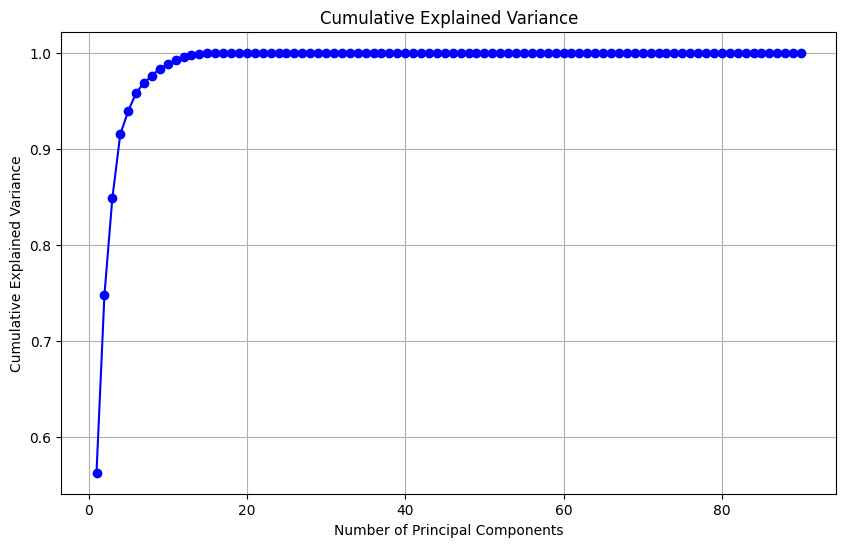

In [30]:
# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')

plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [31]:
# Initialize the classifier with suggested hyperparameters
ann_classifier = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Example architecture, adjust as needed
    max_iter=500,
    random_state=42,
    alpha=0.0001,  # L2 regularization term
    learning_rate='adaptive',  # Adjust the learning rate dynamically
    early_stopping=True,  # Enable early stopping
    validation_fraction=0.1,  # Fraction of training data to be used as validation set
)

In [32]:
# Train the model
ann_classifier.fit(X_train, y_train)


MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 50),
              learning_rate='adaptive', max_iter=500, random_state=42)

In [33]:
# Make predictions on the test set
y_pred = ann_classifier.predict(X_test)

In [34]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}\n')
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.1828

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         4
           3       0.20      0.17      0.18         6
           4       0.33      0.41      0.37        17
           5       0.00      0.00      0.00         8
           6       0.12      0.17      0.14         6
           7       0.13      0.40      0.20         5
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         7
          12       0.40      0.17      0.24        23
          13       0.15      0.22      0.18         9
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         0

    accuracy                           0.18        93
   macro avg       0.09      0.10     

In [35]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 25), (50, 50)],
    'alpha': [0.0001, 0.001, 0.01],
}


In [36]:
# Initialize the classifier
ann_classifier = MLPClassifier(max_iter=500, random_state=42)

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
# Perform GridSearchCV
grid_search = GridSearchCV(ann_classifier, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=500, random_state=42),
             n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(100,), (50, 25), (50, 50)]},
             verbose=2)

In [39]:
# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'alpha': 0.0001, 'hidden_layer_sizes': (50, 25)}


In [40]:
# Get the best model
best_ann_classifier = grid_search.best_estimator_

In [41]:
# Make predictions on the test set
y_pred = best_ann_classifier.predict(X_test)

In [42]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}\n')
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.3656

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         6
           4       0.35      0.35      0.35        17
           5       0.00      0.00      0.00         8
           6       0.11      0.17      0.13         6
           7       0.67      0.80      0.73         5
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         7
          12       0.67      0.87      0.75        23
          13       0.33      0.33      0.33         9
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         2

    accuracy                           0.37        93
   macro avg       0.15      0.18      0.16        93
weighted avg       0.30      0.37     

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [44]:
# Training the model and capturing the loss history
history = best_ann_classifier.fit(X_train, y_train).loss_curve_

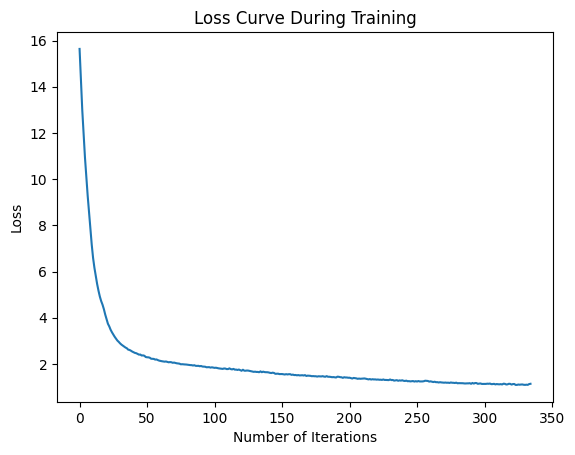

In [45]:
# Plot the loss curve
plt.plot(history)
plt.title('Loss Curve During Training')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.show()

Uncomment the below code for more optimised results and will take around 40-45 minutes.

In [46]:
# # Parameter grid for hyperparameter tuning
# param_grid = {
#     'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 25)],
#     'max_iter': [500, 1000, 1500],
#     'alpha': [0.0001, 0.001, 0.01],
# }


In [47]:
# Create MLPClassifier
# mlp = MLPClassifier(random_state=42)

In [48]:
# Create GridSearchCV
# grid_search = GridSearchCV(mlp, param_grid, cv=3, n_jobs=-1, verbose=2)

In [49]:
# Fit the model
# grid_search.fit(X_train_smote, y_train_smote)

In [50]:
# Get the best parameters
# best_params = grid_search.best_params_
# print(f"Best Hyperparameters: {best_params}")

In [51]:
# Make predictions on the test set
# y_pred = grid_search.predict(X_test)

In [52]:
# # Print accuracy and classification report
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy:.4f}\n')
# print('Classification Report:\n', classification_report(y_test, y_pred))

In [69]:
# Plot the results
def plot_results2(x_train, y_train, y_pred):
    plt.plot(x_train, label="Training Data")
    #plt.plot(np.arange(len(x_train), len(x_train) + len(y_train)), y_train, label="True Values", color="blue")
    #plt.plot(np.arange(len(x_train), len(x_train) + len(y_pred)), y_pred, label="GP Prediction", color="red")


In [53]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import accuracy_score, classification_report


In [54]:
# Create SVC
svm_classifier = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)


In [55]:
# Train the SVM model
svm_classifier.fit(X_train, y_train)

SVC(C=1, random_state=42)

In [56]:
# Make predictions on the test set
svm_predictions = svm_classifier.predict(X_test)


In [57]:
# Print accuracy and classification report
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'SVM Accuracy: {svm_accuracy:.4f}\n')
print('SVM Classification Report:\n', classification_report(y_test, svm_predictions))

SVM Accuracy: 0.2903

SVM Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         6
           4       0.24      0.29      0.26        17
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         7
          12       0.33      0.96      0.49        23
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         2

    accuracy                           0.29        93
   macro avg       0.04      0.10      0.06        93
weighted avg       0.13      0.29      0.17        93



In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier


In [72]:
# Create and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [73]:
# Make predictions
dt_predictions = dt_model.predict(X_test)

In [74]:
# Evaluate the model
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f'Decision Tree Accuracy: {dt_accuracy:.4f}')
print('Classification Report:\n', classification_report(y_test, dt_predictions))

Decision Tree Accuracy: 0.3548
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         6
           4       0.30      0.47      0.36        17
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         6
           7       1.00      0.40      0.57         5
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         7
          12       0.80      0.87      0.83        23
          13       0.27      0.33      0.30         9
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         2

    accuracy                           0.35        93
   macro avg       0.17      0.15      0.15        93
weighted avg       0.33  

In [75]:
# Create and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [76]:
# Make predictions
rf_predictions = rf_model.predict(X_test)

In [77]:
# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy:.4f}')
print('Classification Report:\n', classification_report(y_test, rf_predictions))

Random Forest Accuracy: 0.3118
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         6
           4       0.26      0.29      0.28        17
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         6
           7       1.00      0.20      0.33         5
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         7
          12       0.69      0.87      0.77        23
          13       0.27      0.33      0.30         9
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         0

    accuracy                           0.31        93
   macro avg       0.15  

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train the model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
knn_predictions = knn_model.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f'k-NN Accuracy: {knn_accuracy:.4f}')
print('Classification Report:\n', classification_report(y_test, knn_predictions))


k-NN Accuracy: 0.3118
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         2
           2       0.20      0.25      0.22         4
           3       0.00      0.00      0.00         6
           4       0.25      0.35      0.29        17
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         7
          12       0.60      0.91      0.72        23
          13       0.12      0.11      0.12         9
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         2

    accuracy                           0.31        93
   macro avg       0.08      0.12      0.10        93
weighted avg       0.21      0.31 

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create and train the model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test)

# Evaluate the model
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f'Logistic Regression Accuracy: {lr_accuracy:.4f}')
print('Classification Report:\n', classification_report(y_test, lr_predictions))


Logistic Regression Accuracy: 0.2473
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         6
           4       0.11      0.06      0.08        17
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         7
          12       0.30      0.96      0.46        23
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         0

    accuracy                           0.25        93
   macro avg       0.03      0.07      0.04        93
weighted avg       